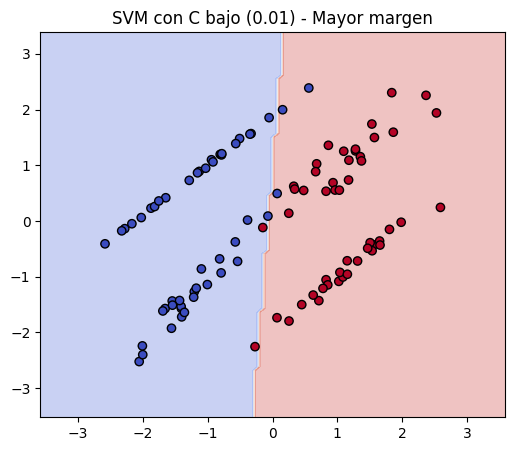

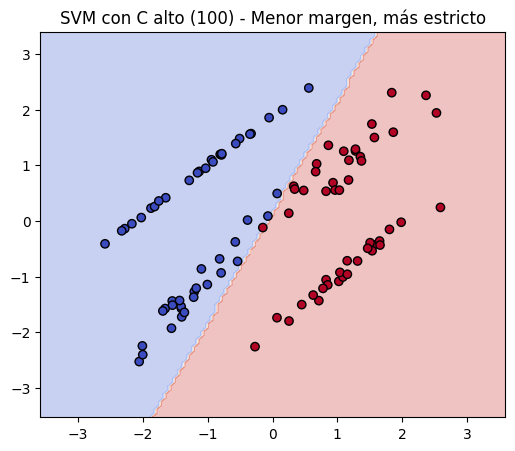

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generar datos de clasificación
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertir etiquetas a (-1, 1) para SVM

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos SVM con diferentes valores de C
svm_c_low = LinearSVC(loss="hinge", C=0.01, random_state=42)  # Mayor margen, más errores permitidos
svm_c_high = LinearSVC(loss="hinge", C=100, random_state=42)   # Menor margen, menos errores permitidos

svm_c_low.fit(X_train, y_train)
svm_c_high.fit(X_train, y_train)

# Función para graficar las fronteras de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar las fronteras de decisión para C bajo y C alto
plot_svm_decision_boundary(svm_c_low, X, y, "SVM con C bajo (0.01) - Mayor margen")
plot_svm_decision_boundary(svm_c_high, X, y, "SVM con C alto (100) - Menor margen, más estricto")


In [2]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de valores de C a probar
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(LinearSVC(loss="hinge"), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor valor de C encontrado
print("Mejor C encontrado:", grid_search.best_params_['C'])


Mejor C encontrado: 100


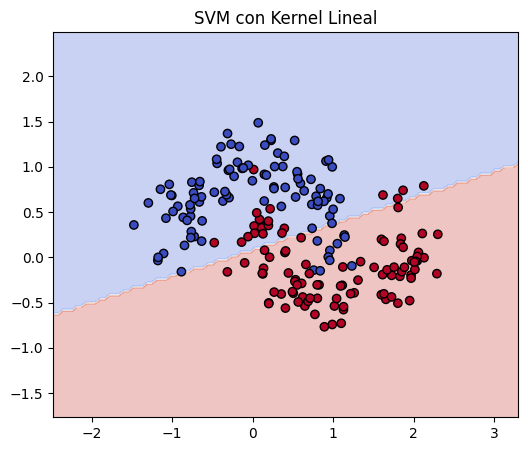

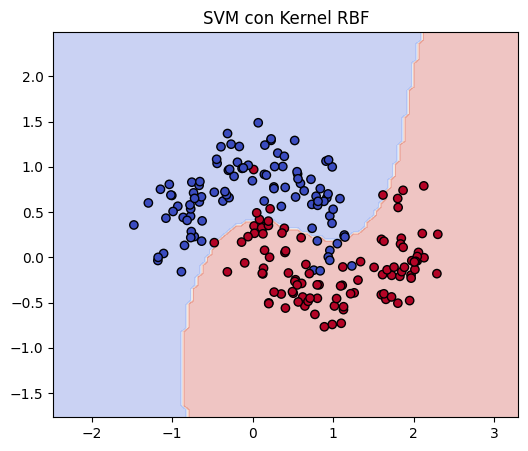

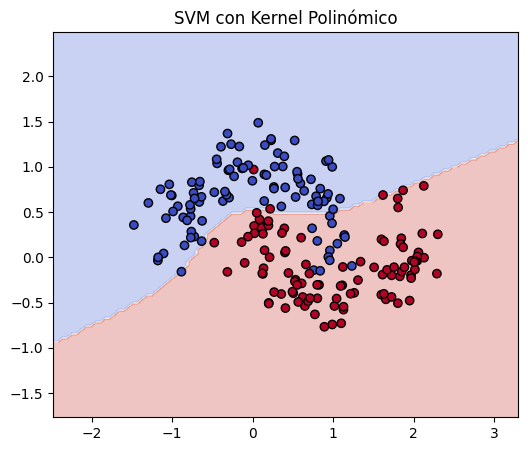

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Crear datos no linealmente separables (forma de luna)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelos SVM con diferentes kernels (todos usan Hinge Loss por defecto en SVC)
svm_linear = SVC(kernel="linear", C=1.0)  # Sin transformación
svm_rbf = SVC(kernel="rbf", C=1.0, gamma=0.5)  # Transformación a dimensiones infinitas
svm_poly = SVC(kernel="poly", C=1.0, degree=3)  # Transformación polinómica

# Entrenar modelos
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Función para graficar la frontera de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar la frontera de decisión para cada kernel
plot_svm_decision_boundary(svm_linear, X, y, "SVM con Kernel Lineal")
plot_svm_decision_boundary(svm_rbf, X, y, "SVM con Kernel RBF")
plot_svm_decision_boundary(svm_poly, X, y, "SVM con Kernel Polinómico")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV

# Crear datos no linealmente separables (forma de luna)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},  # Solo C afecta en lineal
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},  # C y gamma en RBF
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4]},  # C y grado en polinómico
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}  # C y gamma en sigmoide
]

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión en validación:", grid_search.best_score_)


In [4]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar en conjunto de prueba
test_score = best_model.score(X_test, y_test)
print("Precisión en prueba:", test_score)


Precisión en prueba: 0.35


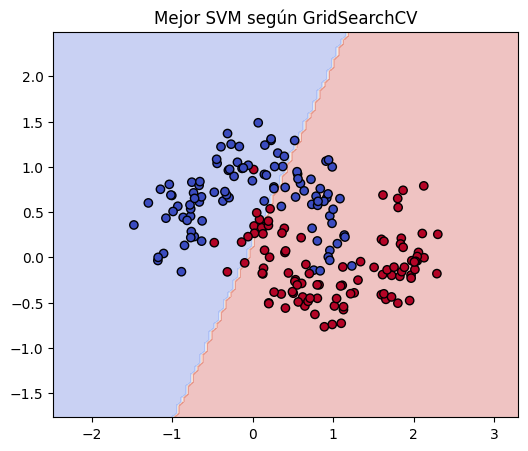

In [5]:
# Función para graficar la frontera de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar la frontera de decisión del mejor modelo
plot_svm_decision_boundary(best_model, X, y, "Mejor SVM según GridSearchCV")

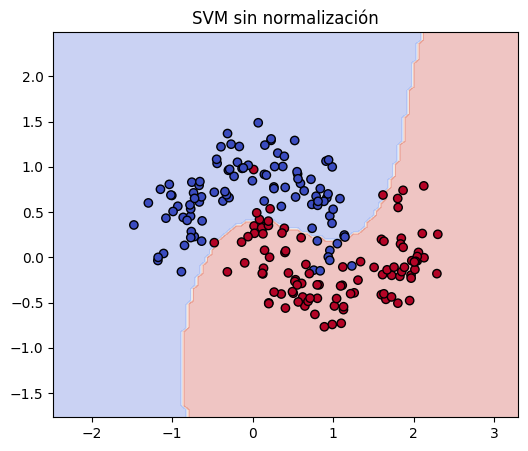

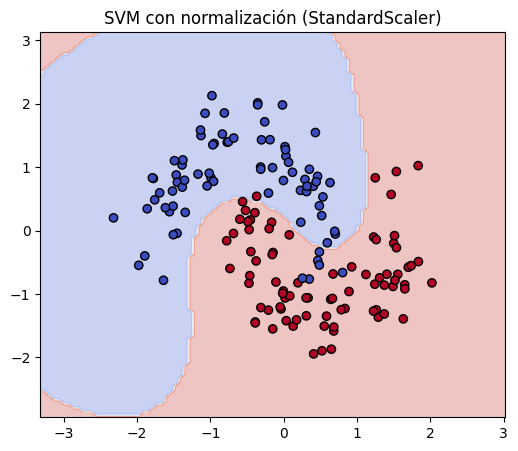

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Crear datos con forma de luna
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 1. Entrenar SVM sin normalización
svm_no_scaling = SVC(kernel="rbf", C=1.0, gamma=0.5)
svm_no_scaling.fit(X_train, y_train)

# 🔹 2. Aplicar estandarización (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 3. Entrenar SVM con normalización
svm_scaled = SVC(kernel="rbf", C=1.0, gamma=0.5)
svm_scaled.fit(X_train_scaled, y_train)

# Función para graficar la frontera de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar SVM sin normalización
plot_svm_decision_boundary(svm_no_scaling, X, y, "SVM sin normalización")

# Graficar SVM con normalización
plot_svm_decision_boundary(svm_scaled, X_train_scaled, y_train, "SVM con normalización (StandardScaler)")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Crear datos no linealmente separables
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔹 SVM sin normalización:
Accuracy: 0.87
Precision: 1.00
Recall: 0.77
F1-score: 0.87
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        43
           1       1.00      0.77      0.87        57

    accuracy                           0.87       100
   macro avg       0.88      0.89      0.87       100
weighted avg       0.90      0.87      0.87       100



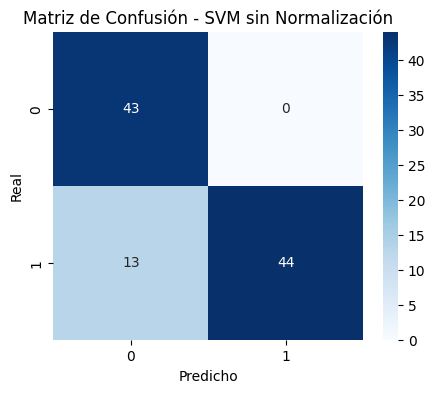

In [8]:
# Modelo SVM sin normalización
svm_no_scaling = SVC(kernel="rbf", C=1.0, gamma=0.5)
svm_no_scaling.fit(X_train, y_train)

# Predicciones sin normalización
y_pred_no_scaling = svm_no_scaling.predict(X_test)

# Evaluar rendimiento
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
precision_no_scaling = precision_score(y_test, y_pred_no_scaling)
recall_no_scaling = recall_score(y_test, y_pred_no_scaling)
f1_no_scaling = f1_score(y_test, y_pred_no_scaling)

print("🔹 SVM sin normalización:")
print(f"Accuracy: {accuracy_no_scaling:.2f}")
print(f"Precision: {precision_no_scaling:.2f}")
print(f"Recall: {recall_no_scaling:.2f}")
print(f"F1-score: {f1_no_scaling:.2f}")
print(classification_report(y_test, y_pred_no_scaling))

# Matriz de confusión sin normalización
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_no_scaling), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - SVM sin Normalización")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()



🔹 SVM con normalización:
Accuracy: 0.85
Precision: 0.98
Recall: 0.75
F1-score: 0.85
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        43
           1       0.98      0.75      0.85        57

    accuracy                           0.85       100
   macro avg       0.86      0.87      0.85       100
weighted avg       0.88      0.85      0.85       100



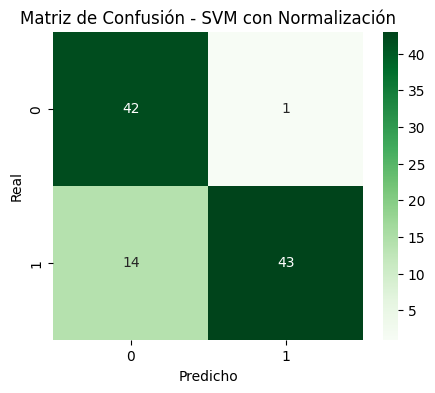

In [9]:
# Aplicar estandarización (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo SVM con normalización
svm_scaled = SVC(kernel="rbf", C=1.0, gamma=0.5)
svm_scaled.fit(X_train_scaled, y_train)

# Predicciones con normalización
y_pred_scaled = svm_scaled.predict(X_test_scaled)

# Evaluar rendimiento
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print("\n🔹 SVM con normalización:")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"F1-score: {f1_scaled:.2f}")
print(classification_report(y_test, y_pred_scaled))

# Matriz de confusión con normalización
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - SVM con Normalización")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores de regularización
    'gamma': [0.01, 0.1, 1, 10],  # Valores de gamma en kernel RBF
    'kernel': ['rbf']  # Solo probamos con RBF
}

# Aplicar GridSearchCV con validación cruzada (cv=5)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
best_params = grid_search.best_params_
print("🔹 Mejores parámetros encontrados:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

🔹 Mejores parámetros encontrados: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}



🔹 SVM Optimizado con GridSearchCV:
Accuracy: 0.90
Precision: 0.98
Recall: 0.84
F1-score: 0.91
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.98      0.84      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100



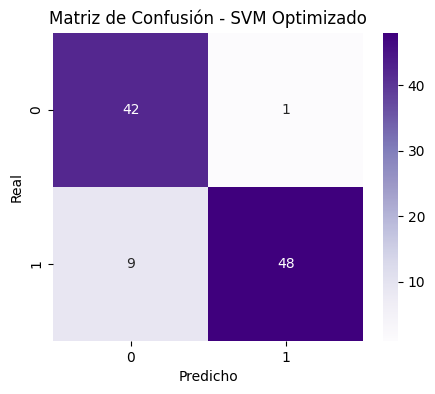

In [11]:
# Predicciones con el modelo optimizado
y_pred_optimized = best_model.predict(X_test_scaled)

# Evaluar rendimiento
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print("\n🔹 SVM Optimizado con GridSearchCV:")
print(f"Accuracy: {accuracy_optimized:.2f}")
print(f"Precision: {precision_optimized:.2f}")
print(f"Recall: {recall_optimized:.2f}")
print(f"F1-score: {f1_optimized:.2f}")
print(classification_report(y_test, y_pred_optimized))

# Matriz de confusión del modelo optimizado
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusión - SVM Optimizado")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [12]:
#
#Crear DataFrame con métricas de comparación
import pandas as pd

results_df = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-score"],
    "SVM con Normalización (Antes)": [accuracy_scaled, precision_scaled, recall_scaled, f1_scaled],
    "SVM Optimizado (GridSearchCV)": [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized]
})



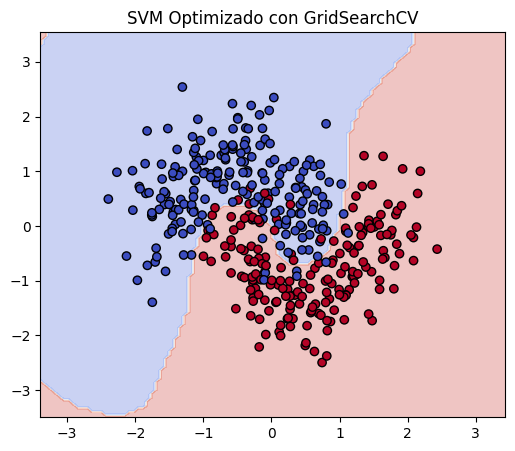

In [13]:
plot_svm_decision_boundary(best_model, X_train_scaled, y_train, "SVM Optimizado con GridSearchCV")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Crear datos de clasificación con dos características
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas a -1 y 1

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar SVM lineal
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

# Obtener los pesos (w) y el bias (b)
w = svm_model.coef_[0]  # Pesos del hiperplano
b = svm_model.intercept_[0]  # Bias

print(f"Pesos del hiperplano (w): {w}")
print(f"Bias (b): {b}")


Pesos del hiperplano (w): [-0.99363557  1.15077177]
Bias (b): 0.9924315797674473


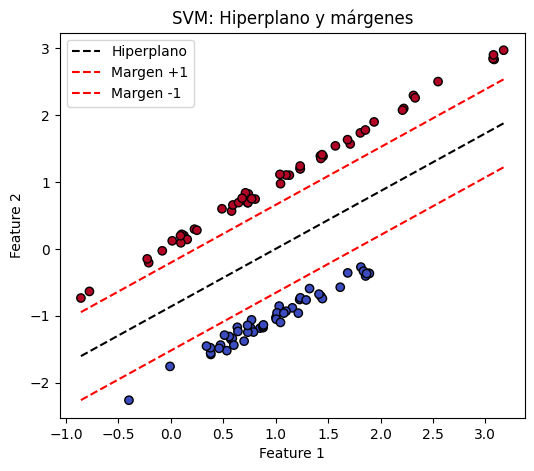

In [15]:
# Graficar los datos y la frontera de decisión
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")

# Dibujar el hiperplano
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]  # Ecuación de la recta
plt.plot(x_vals, y_vals, 'k--', label="Hiperplano")

# Dibujar los márgenes (distancia = 1/||w||)
margin = 1 / np.linalg.norm(w)
plt.plot(x_vals, y_vals + margin, 'r--', label="Margen +1")
plt.plot(x_vals, y_vals - margin, 'r--', label="Margen -1")

plt.legend()
plt.title("SVM: Hiperplano y márgenes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
